# My question is whether videos with fewer views have a greater like-to-view ratio.
# My alternative hypothesis will be that videos with fewer views will have a 20% greater like-to-view ratio due to being niche and doing well with a limited audience.
# In addition, videos with more views attract bots, and since bots engage less with content, they would lower the like-to-view ratio of videos with more views.
# The null hypothesis will be that there is no difference in like-to-view ratio between videos with fewer and more views.
# The group of videos with "less views" will be those with less than 10,000 views, while "more views" will be greater than 10,000 views.

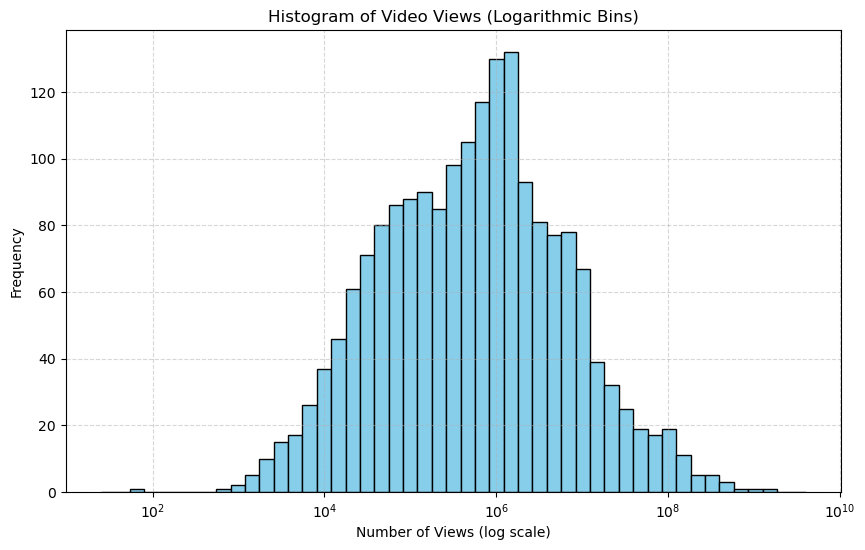

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("videos-stats.csv")

# Make sure the 'views' column exists
if 'Views' not in df.columns:
    raise ValueError("CSV must have a 'Views' column")

# Remove zeros or negative views (can't take log of these)
views = df['Views']
views = views[views > 0]

# Create logarithmic bins
bins = np.logspace(np.log10(views.min()), np.log10(views.max()), 50)  # 50 bins logarithmically spaced

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(views, bins=bins, color='skyblue', edgecolor='black')

# Set x-axis to log scale
plt.xscale('log')

plt.title("Histogram of Video Views (Logarithmic Bins)")
plt.xlabel("Number of Views (log scale)")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()


In [18]:
def proportion_above_below(df, column, threshold):
    """
    Prints the proportion of values below and above a threshold.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data
        column (str): The column name to check
        threshold (float): The threshold value
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")
    
    total = len(df)
    below = (df[column] < threshold).sum()
    above = (df[column] >= threshold).sum()
    
    print(f"Proportion below {threshold}: {below / total:.2%}")
    print(f"Proportion above {threshold}: {above / total:.2%}")


# Example usage:
df = pd.read_csv("videos-stats.csv")
proportion_above_below(df, "Views", 10000)  # e.g., threshold 10,000 views

Proportion below 10000: 4.89%
Proportion above 10000: 95.00%
